<a href="https://colab.research.google.com/github/neelimasrip/MINI-PROJECT/blob/main/intern_mini_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction Model**

Build a diabetes prediction model using a dataset (for example, the Pima Indians Diabetes Dataset), we can use supervised learning algorithms such as Logistic Regression, Decision Trees, or Random Forest. Below is a complete code to build a diabetes prediction model, starting from loading the data to training the model and evaluating its performance.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# **Import** **Libraries**

In [2]:
import pandas as pd
import numpy as np


In [3]:
# Replace 'diabetes.csv' with your uploaded file name
df = pd.read_csv("/content/diabetes.csv")


In [4]:
df.head()       # first 5 rows
df.info()       # data types and missing values
df.describe()   # summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Explore Dataset**

ED consists of:

*  Dataset Info
*  Statsical Measures
*  Missing Value Check
*  Class Distribution
*  Mean Values Grouped by Outcome
*  Visualisation







In [ ]:
if 'Name' in df.columns:
    df.drop('Name', axis=1, inplace=True)


In [ ]:
# Check missing values
df.isnull().sum()

# Option 1: Fill missing with mean/median (for numeric)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Option 2: Drop rows with too many missing values
df.dropna(inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
print(scaled_df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


In [ ]:
# Step 1: Prepare features & target (auto-detect common target names)
import pandas as pd

cols = df.columns.tolist()
target_candidates = ['Outcome','Diabetes','diabetes','target','Target','Label','label','Class','class','diabetes_binary']
target_col = next((c for c in cols if c in target_candidates), None)

if target_col is None:
    target_col = cols[-1]  # fallback to last column
    print(f"No common target column found. Using last column as target: '{target_col}'")
else:
    print(f"Detected target column: '{target_col}'")

X = df.drop(columns=[target_col])
y = df[target_col]
feature_names = X.columns.tolist()

print("Feature columns:", feature_names)
print("Target column:", target_col)


Detected target column: 'Outcome'
Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target column: Outcome


In [ ]:
# Step 2: Split and scale (keeps variable names safe)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Try using stratify (better for class balance); fallback if it fails
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except Exception as e:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes: ", X_test.shape, y_test.shape)

# Scale features (we keep original X, feature_names for plotting importances)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# quick sanity check
import numpy as np
print("Scaled arrays shapes:", X_train_scaled.shape, X_test_scaled.shape)


Train shapes: (614, 8) (614,)
Test shapes:  (154, 8) (154,)
Scaled arrays shapes: (614, 8) (154, 8)


In [ ]:
# Step 3: Train models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree_model = DecisionTreeClassifier(random_state=42)
rf_model   = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

tree_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# predictions
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_rf   = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score

train_acc_tree = accuracy_score(y_train, tree_model.predict(X_train_scaled))
test_acc_tree  = accuracy_score(y_test, y_pred_tree)

train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train_scaled))
test_acc_rf  = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree — Train Acc: {train_acc_tree:.4f} | Test Acc: {test_acc_tree:.4f}")
print(f"Random Forest  — Train Acc: {train_acc_rf:.4f} | Test Acc: {test_acc_rf:.4f}")


Decision Tree — Train Acc: 1.0000 | Test Acc: 0.7208
Random Forest  — Train Acc: 1.0000 | Test Acc: 0.7597


In [ ]:
from sklearn.metrics import classification_report

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



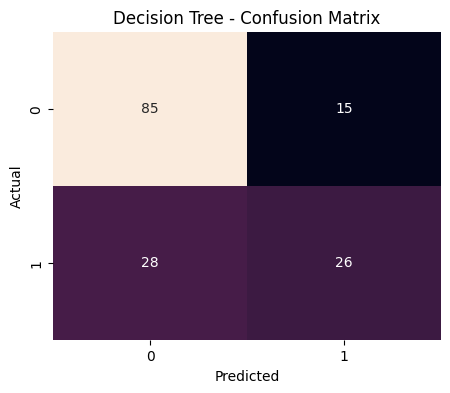

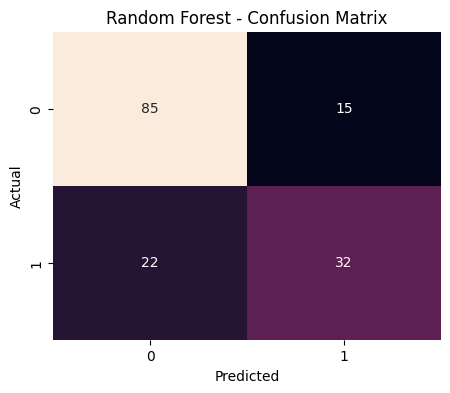

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_cm(y_test, y_pred_tree, "Decision Tree - Confusion Matrix")
plot_cm(y_test, y_pred_rf, "Random Forest - Confusion Matrix")


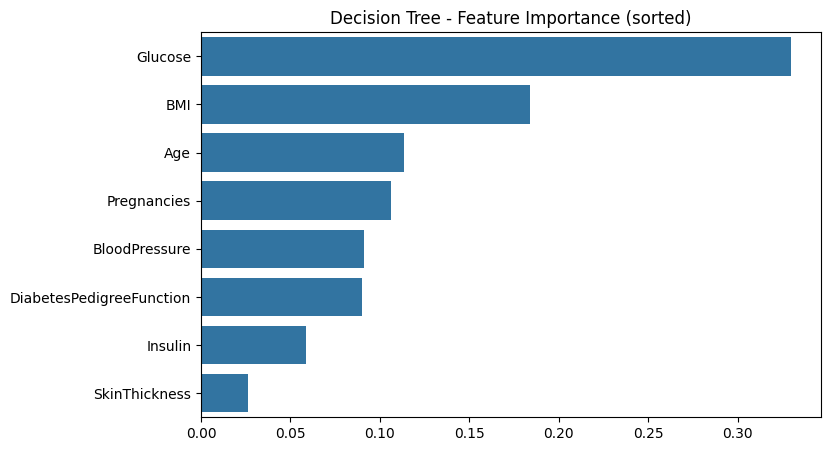

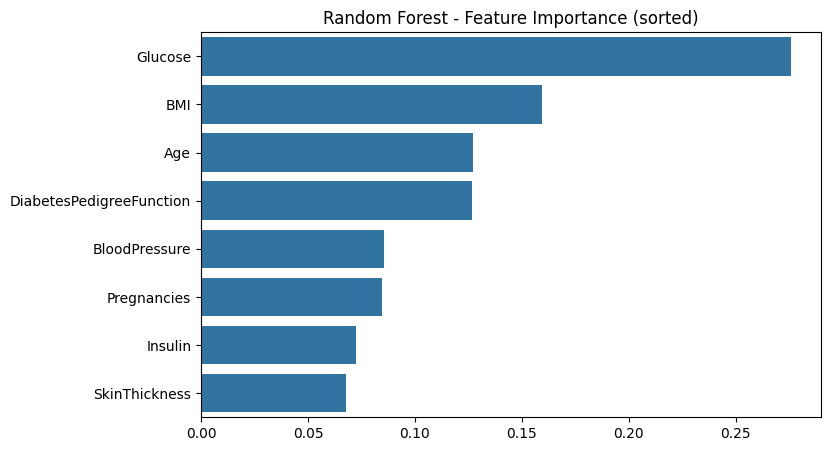

In [ ]:
import numpy as np

# Decision Tree importances
dt_imp = tree_model.feature_importances_
dt_order = np.argsort(dt_imp)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=dt_imp[dt_order], y=np.array(feature_names)[dt_order])
plt.title("Decision Tree - Feature Importance (sorted)")
plt.show()

# Random Forest importances
rf_imp = rf_model.feature_importances_
rf_order = np.argsort(rf_imp)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=rf_imp[rf_order], y=np.array(feature_names)[rf_order])
plt.title("Random Forest - Feature Importance (sorted)")
plt.show()


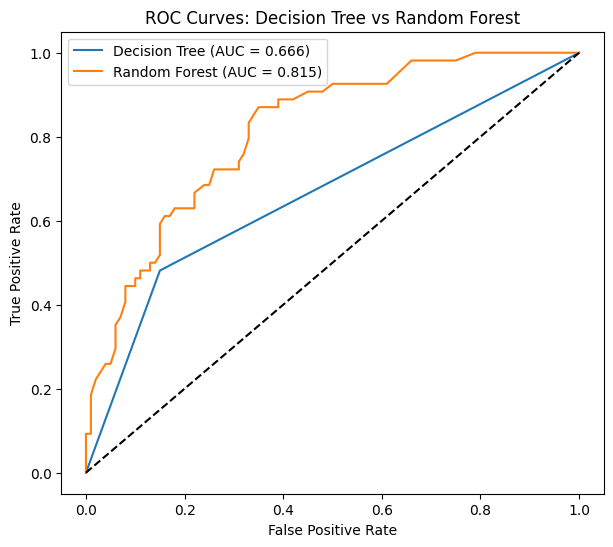

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

for model, name in [(tree_model, "Decision Tree"), (rf_model, "Random Forest")]:
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_scaled)[:,1]
    else:
        # fallback (rare for these models)
        probs = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curves: Decision Tree vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


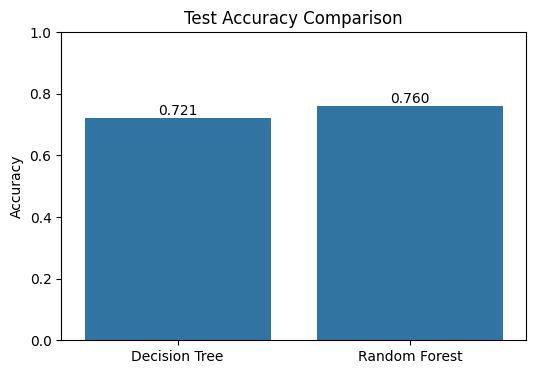

In [ ]:
accs = [test_acc_tree, test_acc_rf]
names = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(6,4))
sns.barplot(x=names, y=accs)
plt.ylim(0,1)
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
for i,v in enumerate(accs):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree grid
dt_params = {"max_depth":[None,3,5,7,10], "min_samples_split":[2,5,10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)
print("Best DT params:", dt_grid.best_params_, "Best CV acc:", dt_grid.best_score_)

# Random Forest grid (smaller grid to save time)
rf_params = {"n_estimators":[50,100,200], "max_depth":[None,5,10], "min_samples_split":[2,5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), rf_params, cv=4, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
print("Best RF params:", rf_grid.best_params_, "Best CV acc:", rf_grid.best_score_)


Best DT params: {'max_depth': 3, 'min_samples_split': 2} Best CV acc: 0.7395041983206717
Best RF params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100} Best CV acc: 0.7850246159069689


In [ ]:
import joblib
# Example: save the Random Forest
joblib.dump(rf_model, "/content/best_random_forest.pkl")
print("Saved RF to /content/best_random_forest.pkl")


Saved RF to /content/best_random_forest.pkl


In [ ]:
from sklearn.metrics import accuracy_score

# Decision Tree Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.7207792207792207
Random Forest Accuracy: 0.7597402597402597


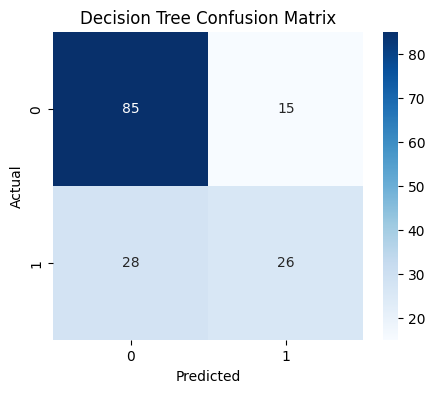

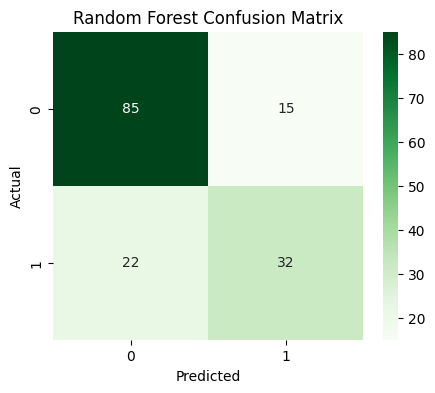

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Decision Tree Report
print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_tree))

# Random Forest Report
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))



--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.63      0.48      0.55        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

